<a href="https://colab.research.google.com/github/koojahyeok/pytorch_study/blob/main/%EA%B5%AC%EC%9E%90%ED%98%81_%EB%8D%B0%EC%9D%B4%ED%84%B0%EC%A0%84%EC%B2%98%EB%A6%AC2_%EA%B3%BC%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 실습 과제

* 데이터셋 설명이 되어 있는 홈페이지입니다. https://www.kaggle.com/datasets/camnugent/california-housing-prices
* 유명한 데이터셋 중 하나이기에 구글링 하면 관련 자료, 코드, 설명 등을 확인할 수 있습니다. 이번 과제는 이 데이터셋을 활용해 전처리를 진행해보는 것입니다.
* 수업에서 배운 내용을 바탕으로 전처리를 진행해보세요. 아래에 비어져 있는 칸을 자유롭게 채우시면 됩니다.

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_california_housing
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from scipy import stats

In [26]:
# 데이터 로드
california = fetch_california_housing()
df = pd.DataFrame(california.data, columns=california.feature_names)
df['MedHouseVal'] = california.target

In [3]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [ ]:
# 데이터 탐색

In [4]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [ ]:
# 결측치 확인 및 처리

In [6]:
df.isnull().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [ ]:
# 이상치 탐지 (시각화, or scaler 사용)

In [8]:
corr = df.corr()
corr

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
MedHouseVal,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


In [9]:
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False

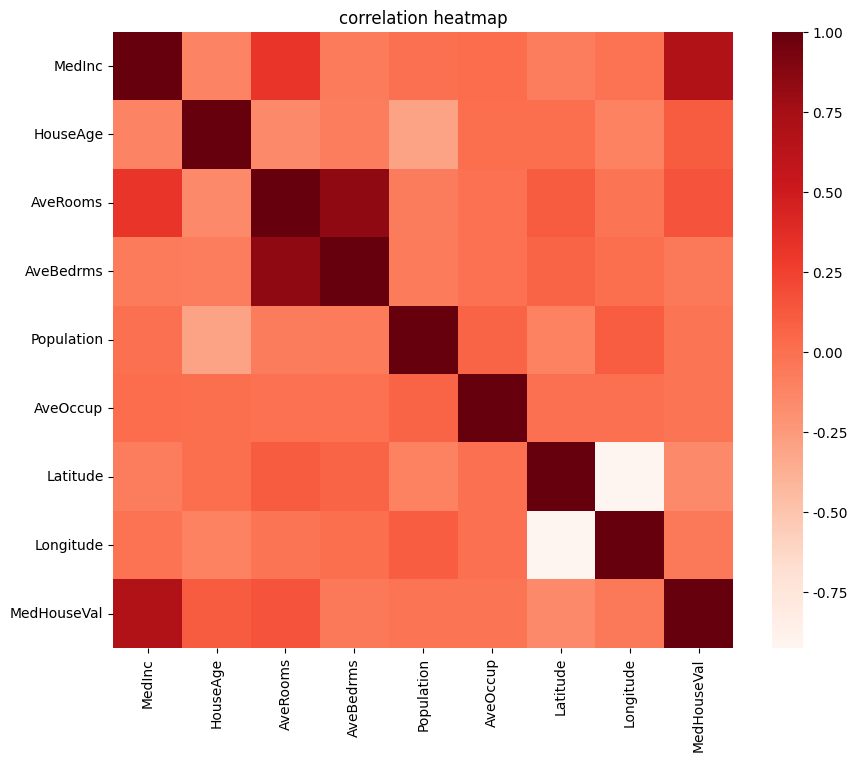

In [10]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap='Reds')
plt.title("correlation heatmap")
plt.show()

MedInc과 양의 상관관계 : MedHouseVal, AveRooms
Latitude와 음의 상관관계: Longitude

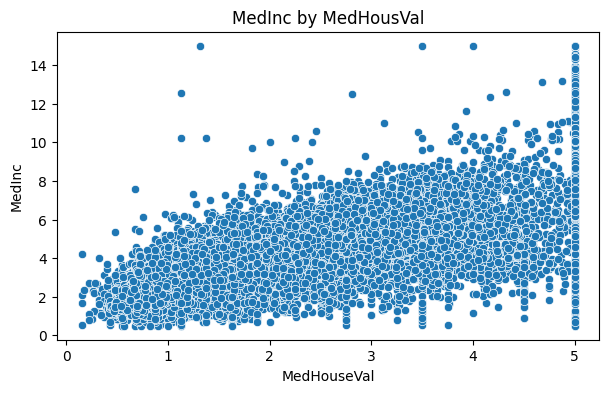

In [23]:
plt.figure(figsize=(7,4))
plt.title("MedInc by MedHousVal")
sns.scatterplot(x=df['MedHouseVal'], y=df['MedInc'])
plt.show()

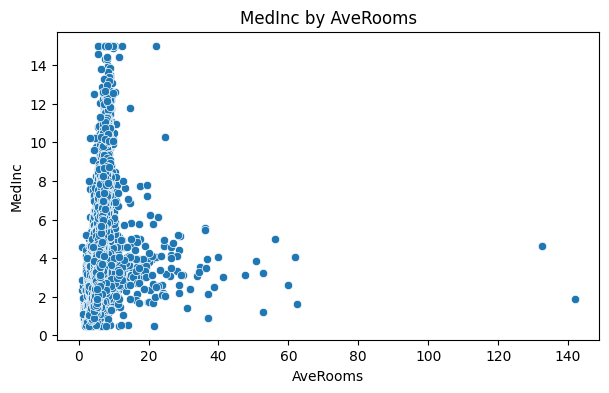

In [12]:
plt.figure(figsize=(7,4))
plt.title("MedInc by AveRooms")
sns.scatterplot(x=df['AveRooms'], y=df['MedInc'])
plt.show()

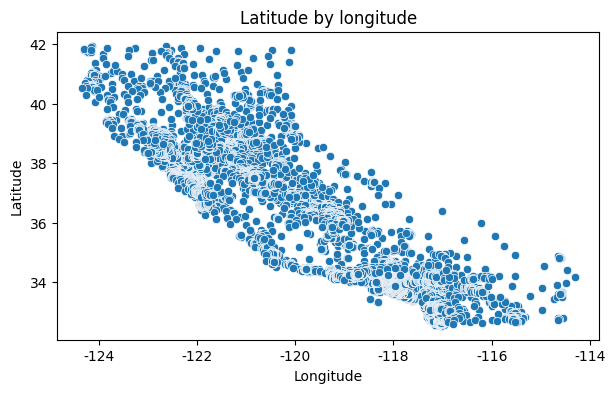

In [13]:
plt.figure(figsize=(7,4))
plt.title("Latitude by longitude")
sns.scatterplot(x=df['Longitude'], y=df['Latitude'])
plt.show()

In [14]:
len(df)

20640

In [27]:
df[(df['MedInc'] >= 12) | (df['MedHouseVal'] >= 5)]

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
89,1.2434,52.0,2.929412,0.917647,396.0,4.658824,37.80,-122.27,5.00001
459,1.1696,52.0,2.436000,0.944000,1349.0,5.396000,37.87,-122.25,5.00001
493,7.8521,52.0,7.794393,1.051402,517.0,2.415888,37.86,-122.24,5.00001
494,9.3959,52.0,7.512097,0.955645,1366.0,2.754032,37.85,-122.24,5.00001
509,7.8772,52.0,8.282548,1.049861,947.0,2.623269,37.83,-122.23,5.00001
...,...,...,...,...,...,...,...,...,...
20422,5.1457,35.0,6.958333,1.217593,576.0,2.666667,34.14,-118.90,5.00001
20426,10.0472,11.0,9.890756,1.159664,415.0,3.487395,34.18,-118.69,5.00001
20427,8.6499,4.0,7.236059,1.032528,5495.0,2.553439,34.19,-118.80,5.00001
20436,12.5420,10.0,9.873315,1.102426,1179.0,3.177898,34.21,-118.69,5.00001


In [28]:
df.drop(df[(df['MedInc'] >= 12) | (df['MedHouseVal'] >= 5)].index, axis = 0, inplace=True)
len(df)

19639

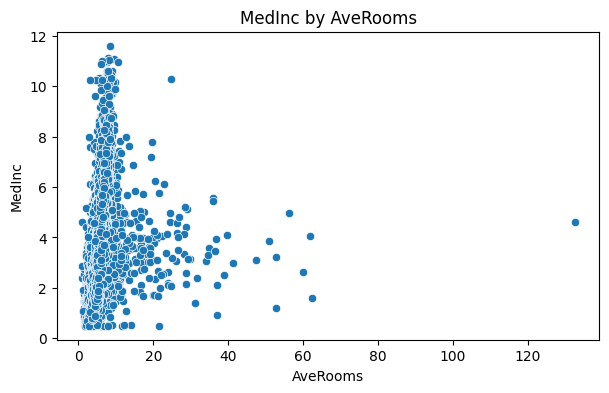

In [29]:
plt.figure(figsize=(7,4))
plt.title("MedInc by AveRooms")
sns.scatterplot(x=df['AveRooms'], y=df['MedInc'])
plt.show()

In [30]:
df[df['AveRooms'] >= 40]

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
1240,3.1250,11.0,47.515152,11.181818,82.0,2.484848,38.42,-120.19,0.775
1912,4.9750,16.0,56.269231,10.153846,54.0,2.076923,39.01,-120.16,2.063
1913,4.0714,19.0,61.812500,11.000000,112.0,2.333333,39.01,-120.06,4.375
1979,4.6250,34.0,132.533333,34.066667,36.0,2.400000,38.80,-120.08,1.625
2395,3.8750,23.0,50.837838,10.270270,64.0,1.729730,37.12,-119.34,1.250
9676,3.2431,14.0,52.848214,11.410714,265.0,2.366071,37.64,-119.02,2.214
11707,1.1912,22.0,52.690476,8.857143,98.0,2.333333,39.15,-120.06,1.700
11832,3.0000,16.0,41.333333,8.476190,44.0,2.095238,39.30,-120.33,1.750
11862,2.6250,25.0,59.875000,15.312500,28.0,1.750000,40.27,-121.25,0.675
12447,1.6154,17.0,62.422222,14.111111,83.0,1.844444,33.97,-114.49,0.875


In [32]:
df.drop(df[df['AveRooms']>=40].index, axis=0, inplace=True)
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [33]:
len(df)

19629

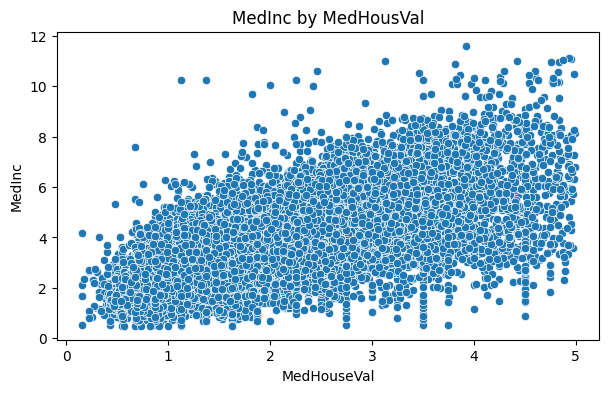

In [34]:
plt.figure(figsize=(7,4))
plt.title("MedInc by MedHousVal")
sns.scatterplot(x=df['MedHouseVal'], y=df['MedInc'])
plt.show()

In [35]:
df[df['AveBedrms']>=10]

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal


In [37]:
df[df['Population']>= 5000]

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
570,7.6110,5.0,6.855776,1.061442,7427.0,2.732524,37.72,-122.24,3.507
576,7.2634,12.0,7.133034,1.018934,5781.0,2.880419,37.77,-122.06,3.416
780,3.8171,18.0,5.119733,1.043679,5613.0,2.884378,37.63,-122.10,1.872
799,2.5158,22.0,4.006152,1.036227,5436.0,3.715653,37.64,-122.07,1.349
864,5.8322,14.0,5.689849,1.051282,8117.0,2.851071,37.57,-122.01,2.818
...,...,...,...,...,...,...,...,...,...
20529,2.9605,12.0,4.915341,1.022451,5633.0,2.634705,38.55,-121.78,2.043
20530,3.1371,11.0,5.070223,1.015530,7984.0,2.695476,38.57,-121.76,2.018
20544,2.0650,23.0,4.803493,1.013646,6330.0,3.455240,38.55,-121.76,2.194
20563,3.1250,9.0,5.148007,1.119593,6837.0,2.899491,38.67,-121.75,1.325


In [39]:
df.drop(df[df['Population']>=5000].index, axis=0, inplace=True)

In [40]:
len(df)

19330

In [44]:
df[df['AveOccup']>= 20]

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
3364,5.5179,36.0,5.142857,1.142857,4198.0,599.714286,40.41,-120.51,0.675
5986,1.8750,52.0,4.500000,1.206349,2688.0,21.333333,34.10,-117.71,2.125
12104,1.6250,8.0,7.600000,0.950000,1275.0,63.750000,33.97,-117.33,1.625
13366,4.2578,36.0,5.258824,1.117647,2886.0,33.952941,33.94,-117.63,1.833
16420,5.7485,26.0,5.366667,0.900000,1542.0,51.400000,37.89,-121.29,1.625


In [45]:
df.drop(df[df['AveOccup']>= 20].index, axis=0, inplace=True)
len(df)

19325

In [ ]:
# 데이터 정규화

In [46]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

In [53]:
len(scaled_data)

19325

In [57]:
house_df_scaled = pd.DataFrame(data=scaled_data, columns=df.columns)

In [58]:
house_df_scaled

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,2.995853,0.998277,0.906611,-0.209141,-1.242592,-0.460270,1.032558,-1.325547,2.680390
1,2.980557,-0.613246,0.498405,-0.371923,1.260959,-0.983105,1.023263,-1.320562,1.712717
2,2.309563,1.884614,1.620166,-0.053545,-1.033059,-0.170879,1.018615,-1.330532,1.646903
3,1.272029,1.884614,0.268150,-0.054758,-0.958398,-0.469197,1.018615,-1.335518,1.535842
4,0.117135,1.884614,0.522326,-0.029612,-0.949969,-0.899086,1.018615,-1.335518,1.545097
...,...,...,...,...,...,...,...,...,...
19320,-1.352046,-0.290941,-0.154233,0.134183,-0.612790,-0.454346,1.776137,-0.757218,-1.170762
19321,-0.711581,-0.854974,0.430496,0.706128,-1.201649,0.205131,1.780784,-0.817042,-1.181045
19322,-1.262259,-0.935550,-0.066632,0.092676,-0.417709,-0.729973,1.752900,-0.822028,-1.024737
19323,-1.154797,-0.854974,0.001204,0.255139,-0.738028,-0.967425,1.752900,-0.871881,-1.102891


In [59]:
house_df_scaled.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,1.932500e+04,19325.000000,1.932500e+04,1.932500e+04,1.932500e+04,1.932500e+04,1.932500e+04,1.932500e+04,1.932500e+04
mean,1.470722e-17,0.000000,-1.264821e-16,-2.081072e-16,-8.162509e-17,-1.654563e-16,-1.882525e-16,1.011857e-15,2.647300e-16
std,1.000026e+00,1.000026,1.000026e+00,1.000026e+00,1.000026e+00,1.000026e+00,1.000026e+00,1.000026e+00,1.000026e+00
min,-2.033581e+00,-2.224768,-2.452094e+00,-2.373576e+00,-1.626734e+00,-2.645912e+00,-1.449137e+00,-2.382439e+00,-1.819658e+00
25%,-7.347191e-01,-0.854974,-5.003478e-01,-2.669691e-01,-6.766135e-01,-5.915650e-01,-8.031531e-01,-1.096221e+00,-7.810192e-01
50%,-1.465067e-01,0.031363,-8.139091e-02,-1.322862e-01,-2.250352e-01,-1.349562e-01,-6.451426e-01,5.289990e-01,-1.886925e-01
75%,5.827815e-01,0.675972,3.467365e-01,2.683643e-02,4.264418e-01,4.145906e-01,9.628470e-01,7.832512e-01,5.763961e-01
max,5.101708e+00,1.884614,1.883936e+01,2.699971e+01,4.381064e+00,1.919609e+01,2.924037e+00,2.622841e+00,3.158570e+00


In [60]:
house_df_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19325 entries, 0 to 19324
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       19325 non-null  float64
 1   HouseAge     19325 non-null  float64
 2   AveRooms     19325 non-null  float64
 3   AveBedrms    19325 non-null  float64
 4   Population   19325 non-null  float64
 5   AveOccup     19325 non-null  float64
 6   Latitude     19325 non-null  float64
 7   Longitude    19325 non-null  float64
 8   MedHouseVal  19325 non-null  float64
dtypes: float64(9)
memory usage: 1.3 MB


In [62]:
# 다음 학습을 위해 전처리 진행한 데이터 저장
house_df_scaled.to_csv('california_house_preprocessed.csv')

### Tip: scaler 사용 방법
간단한 사용법은 아래와 같습니다. 필수사항은 아니기에 관심있으시면 공부해보시는 것을 추천드립니다.

In [ ]:
# 이를 위해 pip install scikit-learn 을 해야 할 수 있습니다.

# Z score Scaler 사용법
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data) # data에 scaling 하고 싶은 data(칼럼 형태로) 삽입

# Min-Max Scaler 사용법
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data) # data에 scaling 하고 싶은 data(칼럼 형태로) 삽입